In [5]:
%load_ext autoreload
%autoreload 2
import torch

import matplotlib.pyplot as plt

from datasets import symbolic_1
from architectures.simlpe_mlp import SimpleMLP
import iterative_magnitude_pruning_with_reinit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# training
train_loader, test_loader = symbolic_1.get_dataloaders()
model = SimpleMLP(weight_shape=[symbolic_1.INPUT_DIM, 20, 20, symbolic_1.OUTPUT_DIM])

# optimizer and loss
lr = 0.1
training_epochs = 60
optim = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss(reduction="mean")

# pruning hparams
pruning_levels=20
pruning_rate=0.1

train_loss, eval_loss = iterative_magnitude_pruning_with_reinit.run(
    model=model,
    pruning_levels=pruning_levels,
    pruning_rate=pruning_rate,
    train_loader=train_loader,
    test_loader=test_loader,
    optim=optim,
    loss_fn=loss_fn,
    training_epochs=training_epochs
)

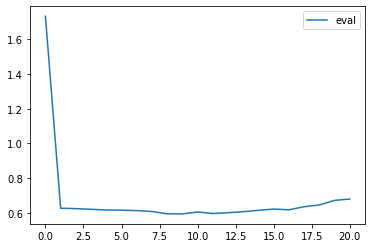

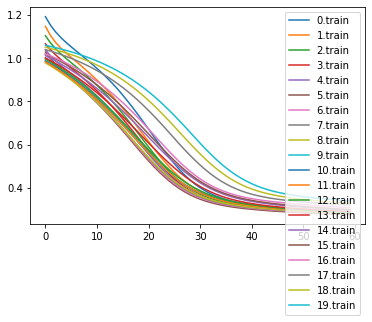

In [3]:
plt.plot(eval_loss, label="eval")
plt.legend()
plt.show()
for i, loss in enumerate(train_loss):
    plt.plot(loss, label=f"{i}.train")
plt.legend()
plt.show()